Este projeto é uma análise exploratória do dataset Intel Image Classification, disponível no Kaggle. O dataset contém 25 mil imagens de 6 classes diferentes, sendo elas: buildings, forest, glacier, mountain, sea e street. O objetivo é classificar as imagens de acordo com a classe a qual pertencem.



In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

### Preparing Dataset

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory('./seg_train', batch_size=64, image_size=(150, 150),  label_mode='categorical')
validation_dataset = keras.utils.image_dataset_from_directory('./seg_test', batch_size=64, image_size=(150, 150),  label_mode='categorical')
# prediction_dataset = keras.utils.image_dataset_from_directory('./seg_pred', batch_size=64,  shuffle=True, image_size=(150, 150))

## Exploratore Analysis

Como veremos abaixo, o dataset é composto por imagens de 150x150 pixels, coloridas e com 3 canais (RGB). Além disso, o dataset é balanceado, ou seja, possui a mesma quantidade de imagens para cada classe.
Exibiremos algumas imagens do dataset para melhor entendimento.



In [ ]:
# # Describe some characteristics of the dataset.
# print(train_dataset.class_names)
# print(validation_dataset.class_names)
# print(train_dataset)
# print(validation_dataset)

# # Visualize one of the images in the dataset.
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(train_dataset.class_names[labels[i]])
#         plt.axis("off")

### Model Definition

We opted in to store all the neural newtorks in a dictionary, so we can easily access them later on.


In [ ]:
neural_networks = [
    {
        'description': 'Conv2D_MaxPooling_Conv2D',
        'model': Sequential([
                    Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
                    MaxPooling2D(pool_size=(2, 2)),
                    Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'),
                    Flatten(input_shape=(150, 150, 3)),
                    Dense(units=6, activation='softmax')
                    ]
                ),
        'epochs': 1,
        'optimizer': Adam(learning_rate=0.0001),
        'loss_function': 'categorical_crossentropy',
        'accuracy': None,
        'loss': None,
        'training_time': None,
    }
]

In [ ]:
for nn in neural_networks:
    model = nn['model']
    model.compile(optimizer=nn['optimizer'], loss=nn['loss_function'], metrics=['accuracy'])

### Model Training

In [ ]:
for nn in neural_networks:
    model = nn['model']
    model.fit(
        train_dataset,
        # validation_data=validation_dataset,
        epochs=nn['epochs'],
        verbose=1
    )
    model.save('models/' + nn['description'] + '.h5')


### Model Predition

In [ ]:
for nn in neural_networks:
    model = nn['model']
    # print(prediction_dataset)
    print(model.summary())
    model.evaluate(validation_dataset, verbose=1)

# predictions = model.predict(prediction_dataset, verbose=2)

## Visualizing

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(validation_dataset), axis=1)
y_true = np.concatenate([y for x, y in validation_dataset], axis=0)
y_true = np.argmax(y_true, axis=1)  
cm = confusion_matrix(y_true, y_pred)

47/47 [==============================] - 6s 126ms/step


In [27]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

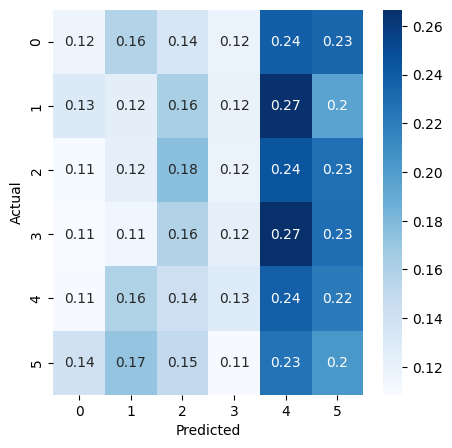

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()